In [1]:
import os, shutil

original_dataset_dir = "D:\Python\Keras\cat_dog\\train"

base_dir = "D:\Python\Keras\cat_dog_data"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Q:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

history = model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=validation_generator,
                            validation_steps=50)

model.save('cats_and_dogs_small_1.h5')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 8s 82ms/step - loss: 0.6874 - acc: 0.5475 - val_loss: 0.6802 - val_acc: 0.5330
Epoch 2/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6563 - acc: 0.6155 - val_loss: 0.6396 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6207 - acc: 0.6595 - val_loss: 0.7031 - val_acc: 0.5670
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5779 - acc: 0.6940 - val_loss: 0.5927 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5431 - acc: 0.7310 - val_loss: 0.5869 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5179 - acc: 0.7365 - val_loss: 0.5754 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 6s 62ms/step - loss: 0.4830 - acc: 0.7750 - val_loss: 0.6051 - v

# OVERFITTING

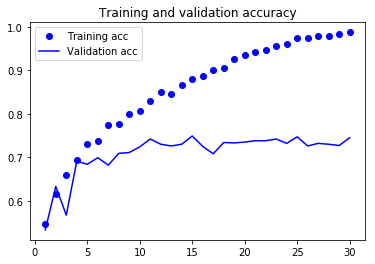

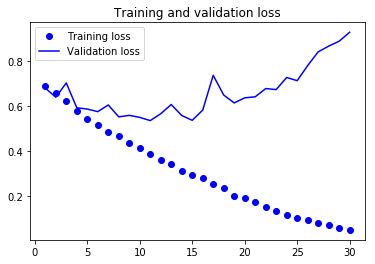

In [5]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# AUGMENTATION 

D:\Python\Keras\cat_dog_data\train\cats\cat.100.jpg


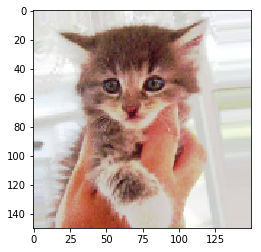

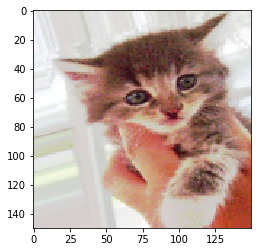

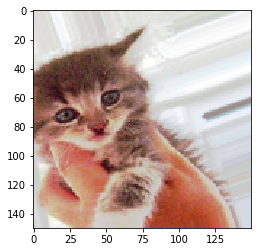

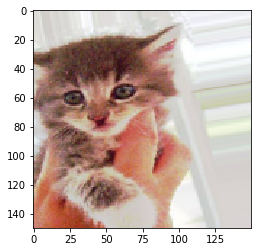

In [26]:
datagen = ImageDataGenerator(rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest')

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
print(img_path)
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [28]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='binary')

history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6930 - acc: 0.5194 - val_loss: 0.6764 - val_acc: 0.5704
Epoch 2/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6836 - acc: 0.5709 - val_loss: 0.6629 - val_acc: 0.6199
Epoch 3/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6668 - acc: 0.5988 - val_loss: 0.6501 - val_acc: 0.6015
Epoch 4/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6518 - acc: 0.6178 - val_loss: 0.6222 - val_acc: 0.6320
Epoch 5/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6459 - acc: 0.6200 - val_loss: 0.6369 - val_acc: 0.6269
Epoch 6/100
100/100 [==============================] - 23s 233ms/step - loss: 0.6189 - acc: 0.6547 - val_loss: 0.6575 - val_acc: 0.5977
Epoch 7/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6244 - acc: 0.6581 -

100/100 [==============================] - 20s 198ms/step - loss: 0.4108 - acc: 0.8081 - val_loss: 0.4836 - val_acc: 0.7709
Epoch 61/100
100/100 [==============================] - 20s 197ms/step - loss: 0.4121 - acc: 0.8181 - val_loss: 0.4021 - val_acc: 0.8236
Epoch 62/100
100/100 [==============================] - 21s 212ms/step - loss: 0.4095 - acc: 0.8100 - val_loss: 0.3871 - val_acc: 0.8325
Epoch 63/100
100/100 [==============================] - 21s 205ms/step - loss: 0.4045 - acc: 0.8153 - val_loss: 0.4134 - val_acc: 0.8147
Epoch 64/100
100/100 [==============================] - 20s 203ms/step - loss: 0.3970 - acc: 0.8228 - val_loss: 0.4197 - val_acc: 0.8160
Epoch 65/100
100/100 [==============================] - 20s 204ms/step - loss: 0.3993 - acc: 0.8147 - val_loss: 0.5287 - val_acc: 0.7513
Epoch 66/100
100/100 [==============================] - 21s 207ms/step - loss: 0.4056 - acc: 0.8131 - val_loss: 0.4397 - val_acc: 0.8071
Epoch 67/100
100/100 [==============================] 

In [29]:
model.save('cats_and_dogs_small_2.h5')

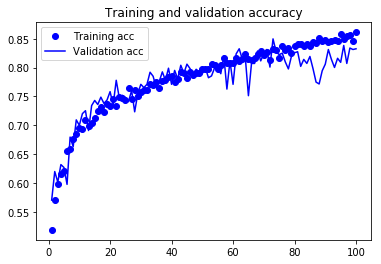

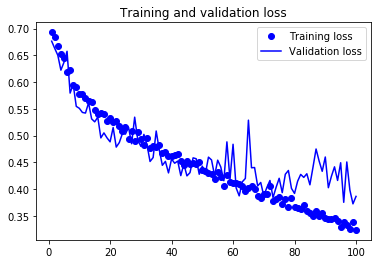

In [68]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# FEATURE EXTRACTION with VGG16

In [121]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

In [122]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "D:\Python\Keras\cat_dog_data"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                directory,
                target_size=(150, 150),
                batch_size=batch_size,
                class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [125]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])

history = model.fit(train_features, train_labels,
                epochs=30,
                batch_size=20,
                validation_data=(validation_features, validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 862us/step - loss: 0.8070 - acc: 0.5760 - val_loss: 0.5445 - val_acc: 0.7860
Epoch 2/30
2000/2000 [==============================] - 1s 729us/step - loss: 0.5943 - acc: 0.6870 - val_loss: 0.4592 - val_acc: 0.8200
Epoch 3/30
2000/2000 [==============================] - 1s 729us/step - loss: 0.5011 - acc: 0.7540 - val_loss: 0.4053 - val_acc: 0.8520
Epoch 4/30
2000/2000 [==============================] - 1s 729us/step - loss: 0.4395 - acc: 0.7925 - val_loss: 0.3741 - val_acc: 0.8540
Epoch 5/30
2000/2000 [==============================] - 1s 728us/step - loss: 0.3988 - acc: 0.8255 - val_loss: 0.3456 - val_acc: 0.8690
Epoch 6/30
2000/2000 [==============================] - 1s 729us/step - loss: 0.3865 - acc: 0.8315 - val_loss: 0.3403 - val_acc: 0.8530
Epoch 7/30
2000/2000 [==============================] - 1s 728us/step - loss: 0.3574 - acc: 0.8500 - val_loss: 0.3169 - val_acc: 0.8720


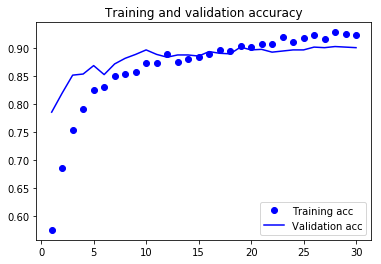

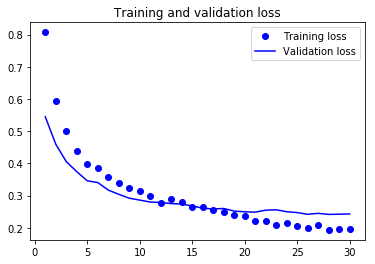

In [126]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 2000 images belonging to 2 classes.


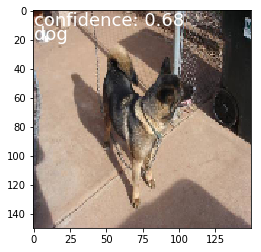

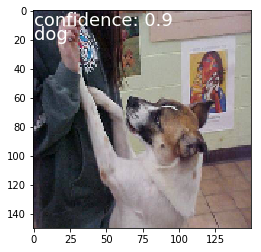

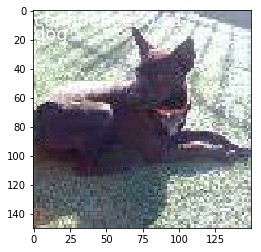

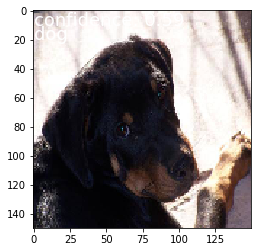

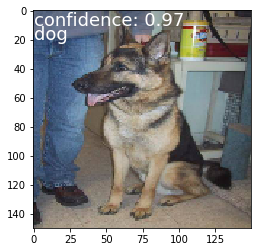

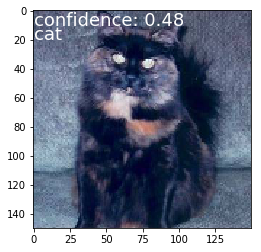

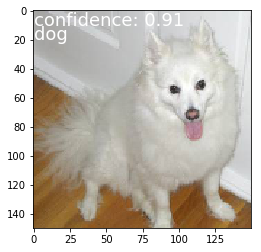

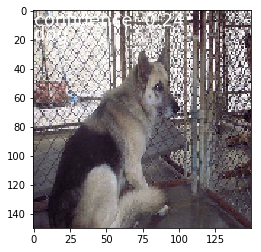

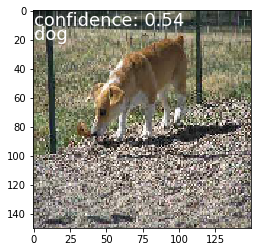

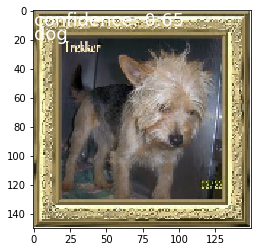

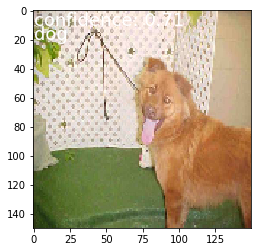

In [137]:
import numpy as np
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

test_generator = test_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=1,
                    class_mode='binary')

i = 0
for img in test_generator:
    c = img[1][0]
    img = img[0]
    
    features = conv_base.predict(img)
    
    k = model.predict(features.reshape(-1,8192))[0][0]
    if int(round(k)) == int(c):
        continue
    plt.figure(i)
    img = img[0]
    plt.imshow(img)
    plt.text(0,10,"confidence: " + str(round(k*2 if int(c) else (1-k)*2,2)),fontsize=18,color='white')
    plt.text(0,20,"dog" if int(c) else "cat",fontsize=18,color='white')
    i+=1
    if i > 10:
        break
plt.show()

# FINE TUNING

In [138]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [141]:
conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
            metrics=['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

#model.save('cats_and_dogs_vgg_finetuned.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 100s 1s/step - loss: 0.6034 - acc: 0.6865 - val_loss: 0.4633 - val_acc: 0.8130
Epoch 2/30
100/100 [==============================] - 100s 997ms/step - loss: 0.4880 - acc: 0.7875 - val_loss: 0.3741 - val_acc: 0.8540
Epoch 3/30
100/100 [==============================] - 99s 994ms/step - loss: 0.4435 - acc: 0.7980 - val_loss: 0.3344 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 100s 998ms/step - loss: 0.3995 - acc: 0.8295 - val_loss: 0.3115 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 99s 991ms/step - loss: 0.3946 - acc: 0.8290 - val_loss: 0.2994 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 99s 989ms/step - loss: 0.3761 - acc: 0.8305 - val_loss: 0.2873 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 99s 986ms/step - loss: 0.3657 - acc: 0.8300 - val_lo

In [ ]:
model.save('cats_and_dogs_vgg_finetuned_verytop.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-5),
            metrics=['acc'])
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)
model.save('cats_and_dogs_vgg_finetuned_all.h5')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
            smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
            smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
            smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
            smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# TEST

Found 2000 images belonging to 2 classes.


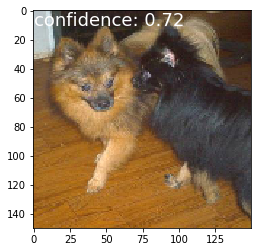

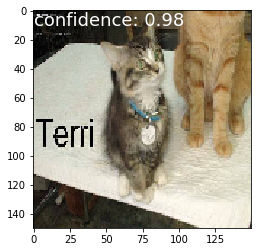

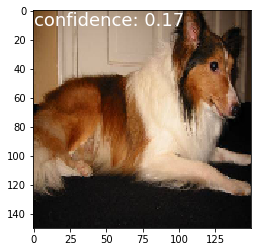

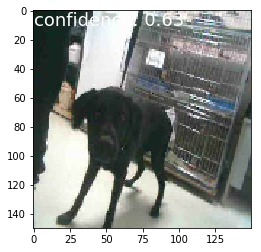

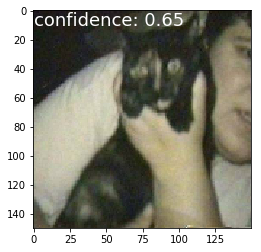

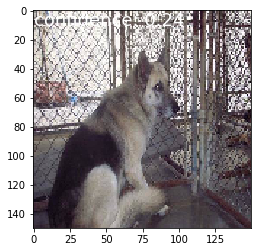

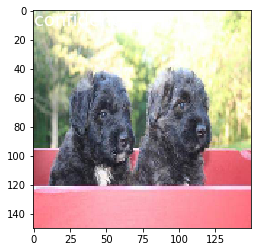

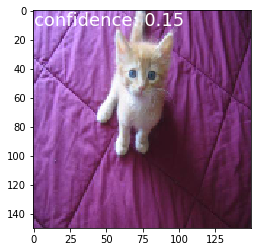

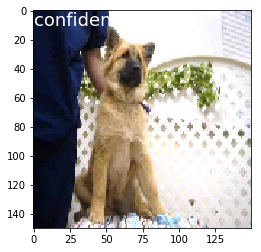

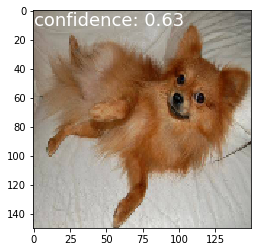

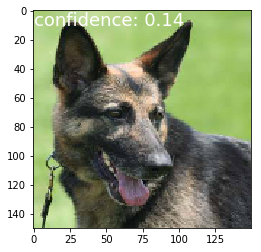

In [130]:
import numpy as np
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

test_generator = test_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=1,
                    class_mode='binary')

i = 0
for img in test_generator:
    c = img[1][0]
    img = img[0][0]
    k = model.predict(img.reshape(-1,150,150,3))[0][0]
    if int(round(k)) == int(c):
        continue
    plt.figure(i)
    plt.imshow(img)
    plt.text(0,10,"confidence: " + str(round(k*2 if int(c) else (1-k)*2,2)),fontsize=18,color='white')
    
    i+=1
    if i > 10:
        break
plt.show()

In [116]:
round(0.4545433,2)

0.45